<a href="https://colab.research.google.com/github/dawsond-smu/Data-Science/blob/master/Project_Spotify_You_have_a_Hit!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spotify
####Context
Spotify hasn't been profitable, though its user-base & revenue is growing. Why? Lots of payments for licensing to record labels. We'd like to change that

##Data (Last 3 years) --> Transform Data (Binary Popularity top 10%) --> Join w/ Year --> Classification Hit/No-Hit Algorithm  

Drop ID, Name, Release_Date

1) Personalization  
2) Finding under-cover artists*  
3) What songs will be a hit  
4) Sentiment of the Time Period  
5) Augmenting Moments  
https://www.forbes.com/sites/petercsathy/2020/02/02/the-future-of-music-where-it-is-today--where-its-going-in-the-next-decade/?sh=68af0f64707e  

####Content
The "data.csv" file contains more than 175.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.
More on Spotify audio features, (https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features)  
More on other Spotify track features, (https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-track)    

#####Primary:
- id (Id of track generated by Spotify)  
####Numerical:
- acousticness (Ranges from 0 to 1): A measure from 0.0 to 1.0 of whether the track is acoustic.
- danceability (Ranges from 0 to 1): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- energy (Ranges from 0 to 1): Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- duration_ms (Integer typically ranging from 200k to 300k): The length of the track in milliseconds (ms)
- instrumentalness (Ranges from 0 to 1): Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- valence (Ranges from 0 to 1): A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- popularity (Ranges from 0 to 100): Is a song popular compared to all songs.
- tempo (Float typically ranging from 50 to 150): The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- liveness (Ranges from 0 to 1): Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- loudness (Float typically ranging from -60 to 0): The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- speechiness (Ranges from 0 to 1): Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- year (Ranges from 1921 to 2020)
#####Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
######Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

#Data Prep  
####Mount Google Drive & Install Packages


In [ ]:
#Mount your Google Drive to pull in and set the wd to it. I'd like to build a Github for this location to copy it over by 1/16/2021
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Spotify

Mounted at /content/gdrive
/content/gdrive/My Drive/Spotify


In [ ]:
# Python Packages
modnames = "os pandas numpy matplotlib altair seaborn plotly sklearn tensorflow statsmodels datetime pydot".split()
for lib in modnames:
    globals()[lib] = __import__(lib)
# General tools
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image, HTML
from plotnine import *
import pydot
from plotnine import *
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from six import StringIO

# For scoring
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split

# sns.set_theme(style="darkgrid")
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import  datasets, tree, neighbors
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
path = 'data.csv'
df = pd.read_csv(path)
df.describe(include='all')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,174389.000000,174389,174389.000000,1.743890e+05,174389.000000,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389,174389.000000,174389,174389.000000,174389.000000,174389.000000,174389.000000
unique,NaN,36195,NaN,NaN,NaN,NaN,172230,NaN,NaN,NaN,NaN,NaN,137013,NaN,11043,NaN,NaN,NaN,NaN
top,NaN,['Tadeusz Dolega Mostowicz'],NaN,NaN,NaN,NaN,0UsmyJDsst2xhX1ZiFF3JW,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN,NaN,NaN
freq,NaN,1281,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,103,NaN,1447,NaN,NaN,NaN,NaN
mean,0.499228,NaN,0.536758,2.328100e+05,0.482721,0.068135,NaN,0.197252,5.205305,0.211123,-11.750865,0.702384,NaN,25.693381,NaN,0.105729,117.006500,0.524533,1977.061764
std,0.379936,NaN,0.176025,1.483958e+05,0.272685,0.251978,NaN,0.334574,3.518292,0.180493,5.691591,0.457211,NaN,21.872740,NaN,0.182260,30.254178,0.264477,26.907950
min,0.000000,NaN,0.000000,4.937000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,NaN,0.414000,1.661330e+05,0.249000,0.000000,NaN,0.000000,2.000000,0.099200,-14.908000,0.000000,NaN,1.000000,NaN,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,NaN,0.548000,2.057870e+05,0.465000,0.000000,NaN,0.000524,5.000000,0.138000,-10.836000,1.000000,NaN,25.000000,NaN,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,NaN,0.669000,2.657200e+05,0.711000,0.000000,NaN,0.252000,8.000000,0.270000,-7.499000,1.000000,NaN,42.000000,NaN,0.076300,135.011000,0.743000,1999.000000


In [ ]:
data = pd.read_csv('data.csv')
genre = pd.read_csv('data_by_genres.csv')
year = pd.read_csv('data_by_year.csv')
artist = pd.read_csv('data_by_artist.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [ ]:
genre.columns = ['genre','acousticness_genre',	'danceability_genre',	'duration_ms_genre',	'energy_genre',	'instrumentalness_genre',	'liveness_genre',	'loudness_genre',	
                'speechiness_genre',	'tempo_genre',	'valence_genre',	'popularity_genre',	'key_genre',	'mode_genre']
year.columns = ['year','acousticness_year',	'danceability_year',	'duration_ms_year',	'energy_year',	'instrumentalness_year',	'liveness_year',	'loudness_year',	
                'speechiness_year',	'tempo_year',	'valence_year',	'popularity_year',	'key_year',	'mode_year']
artist.columns = ['artists', 'acousticness_artist',	'danceability_artist',	'duration_ms_artist',	'energy_artist',	'instrumentalness_artist',	'liveness_artist',	
                  'loudness_artist',	'speechiness_artist',	'tempo_artist',	'valence_artist',	'popularity_artist',	'key_artist',	'mode_artist', 'count_artist']

In [ ]:
# data_year = data.merge(year, on='year', how='left')
data_new = data.loc[(data['year'] >= 2018.000)]
data_new['popularity_group'] = np.where(data_new['popularity'] >= .900, True, False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Get unique number of values in each column
df = data_new # .drop(columns=['release_date']) id, name, artists, release_date dropp as well
#df.nunique()
#drop id, name, release date, 

In [ ]:
df = df[~df.duplicated()==1]
df.shape

(9450, 16)

In [ ]:
df.isnull().sum().sum()

0

##Numeric Data

In [ ]:
numeric_columns = df.columns[df.dtypes != 'object']
string_columns = df.columns[df.dtypes == 'object']
print(f'There are {len(numeric_columns)} numeric columns & {len(string_columns)} string columns')

There are 16 numeric columns & 0 string columns


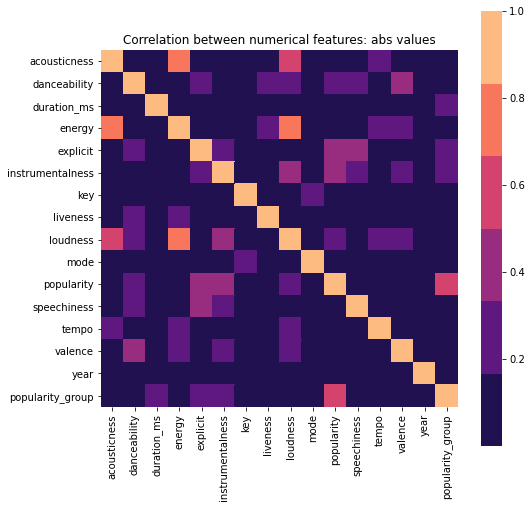

In [ ]:
# Numeric Heatmap
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

In [ ]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    if 0.2 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

The most linear correlated features to POPULARITY are:
popularity_group  -->  0.62 (abs)
explicit          -->  0.45 (abs)
instrumentalness  -->  0.39 (abs)
danceability      -->  0.23 (abs)
loudness          -->  0.21 (abs)


##Categorical Data

In [ ]:
df['duration_ms'].corr(df['popularity'])

-0.16042542475515653

##Numeric
####Acoustic

####Danceability

In [ ]:
a= df['danceability'].corr(df['popularity']).round(2)
print(f'The pearדon corr is -->{a:^10}')

The pearדon corr is -->   0.23   


####Duration

In [ ]:
# convert the miliseconds to minutes
df['duration_min'] = df['duration_ms']/60000
df['long_tracks'] = np.where(df['duration_min'] >= 20, True, False)
df['duration_min'].describe()

count    11177.000000
mean         3.715291
std          2.496252
min          0.082283
25%          2.757300
50%          3.441117
75%          4.198883
max         81.546017
Name: duration_min, dtype: float64

####Energy

In [ ]:
a= df['energy'].corr(df['popularity']).round(3)
print(f'The pearson corr is -->{a:^10}')

The pearson corr is -->  -0.107  


####Instrumentalness

In [ ]:
a= df['instrumentalness'].corr(df['popularity']).round(3)
print(f'The pearson corr is -->{a:^10}')

The pearson corr is -->  -0.388  


####Liveness

In [ ]:
a= df['liveness'].corr(df['popularity']).round(3)
print(f'The pearson corr is -->{a:^10}')

The pearson corr is -->  -0.141  


####Loudness

In [ ]:
df['loudness'].corr(df['popularity'])

0.21327078347607575

####Popularity

####Speechiness

In [ ]:
a= df['speechiness'].corr(df['popularity']).round(2)
print(f'The pearson corr is -->{a:^10}')

The pearson corr is -->   0.08   


####Tempo

In [ ]:
a = df['tempo'].corr(df['popularity']).round(2)
print(f"Linear correlation is {a}")

Linear correlation is -0.01


####Valence

In [ ]:
a = df['valence'].corr(df['popularity']).round(2)
print(f"Linear correlation is {a}")

Linear correlation is 0.07


####Year

In [ ]:
a = df['year'].corr(df['popularity']).round(2)
print(f"Linear correlation is {a}")

Linear correlation is -0.12


####Decision Tree

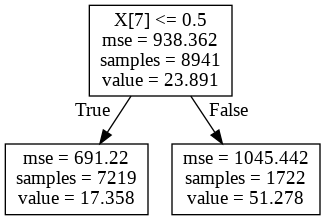

In [ ]:
import pydotplus

X_sp = df[['speechiness', 'tempo','loudness','acousticness','energy','year','danceability','explicit','instrumentalness','liveness','long_tracks', 'duration_ms']]
y_sp = df['popularity']
X_train, X_test, y_train, y_test = split(X_sp, y_sp , test_size = 0.2 , random_state = 42 )
model = DecisionTreeRegressor(max_leaf_nodes=2, splitter = 'best')
model.fit(X_train, y_train)


dot_data = StringIO()
export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
rmse = np.sqrt(mse(y_train, y_pred))
print(f"RMSE_Train = {rmse:.2f}")
#print('The accuracy of the DecisionTree classifier on training data is ', round(accuracy_score(y_train,y_pred)*100,2),'%')

RMSE_Train = 28.32


In [ ]:
y_test_pred = model.predict(X_test)
rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE_test = {rmse:.2f}")

RMSE_test = 28.77


##Pre-Processing

#####Instrumentalness Transformer

In [ ]:
def instrumentalness_criteria(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))

instrumentalness_tranformer = FunctionTransformer(instrumentalness_criteria)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#####Tempo Transformer

In [ ]:
class ReplaceZeroTransformer():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X

In [ ]:
tempo_transformer = ReplaceZeroTransformer()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#####One Hot Encoder

#####Min Max Scaler Encoder

In [ ]:
scaler = MinMaxScaler()
cols = ['speechiness', 'tempo','loudness','acousticness','energy','year','danceability','explicit','instrumentalness','liveness','duration_ms']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

#####Target Scaling

In [ ]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

####Verification

In [ ]:
nl = '\n'
print(f'X_train shape is: {X_train.shape} {nl}y_train shape is: {y_train.shape} {nl}X_test shape is: {X_test.shape} {nl}y_test shape is: {y_test.shape}')

X_train shape is: (8941, 12) 
y_train shape is: (8941,) 
X_test shape is: (2236, 12) 
y_test shape is: (2236,)


In [ ]:
X_train.head(3)

,speechiness,tempo,loudness,acousticness,energy,year,danceability,explicit,instrumentalness,liveness,long_tracks,duration_ms
155809,0.035031,0.761415,0.675245,0.516064,0.278812,0.666667,0.207700,0.0,0.5,0.080363,False,0.063332
173605,0.388773,0.203139,0.840085,0.013553,0.710925,0.000000,0.665653,1.0,0.0,0.222558,False,0.044311
106709,0.052079,0.445443,0.800182,0.000279,0.865965,1.000000,0.740628,0.0,0.5,0.091742,False,0.061443


In [ ]:
X_train.describe().drop(['count','25%', '50%', '75%'])

,speechiness,tempo,loudness,acousticness,energy,year,danceability,explicit,instrumentalness,liveness,duration_ms
mean,0.113258,0.418535,0.764289,0.241486,0.647420,0.442637,0.616067,0.214418,0.174074,0.226158,0.044506
std,0.131581,0.160207,0.110962,0.306961,0.237262,0.331944,0.172526,0.410445,0.259982,0.201406,0.031197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train.describe().drop(['count','25%', '50%', '75%'])

mean    0.278119
std     0.317768
min     0.000000
max     1.000000
Name: popularity, dtype: float64

##Models
#####Linear Regression
Option1:selected features only (corr >0.2)

In [ ]:
LR = LinearRegression()
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))>0.2]

# Fit the model and
LR.fit(X_train.drop(columns=cols), y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train.drop(columns=cols)).clip(0, 1)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.5f}")

#Predicting with the model
y_test_pred = LR.predict(X_test.drop(columns=cols)).clip(0, 1)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.5f}")

RMSE Train = 0.30271
RMSE Test = 0.35933


Option 2: All features

In [ ]:
LR = LinearRegression()

# Fit the model and
LR.fit(X_train, y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train).clip(0, 1)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.6f}")

#Predicting with the model
y_test_pred = LR.predict(X_test).clip(0, 1)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.6f}")

RMSE Train = 0.253060
RMSE Test = 0.286986


In [ ]:
from IPython.display import display, Math

def get_printable_equt(df, inter, coef):
  equtation = '$y = ' + f'{inter:.6f} '
  
  for i, co in enumerate(coef):
    if i == len(coef) - 1:
        equtation = equtation + f'+ {co:.6f} {(df.columns)[i]}$'
    else:
        equtation = equtation + f'+ {co:.6f} {(df.columns)[i]}'

  return display(Math(equtation))

get_printable_equt(X_train, LR.intercept_, LR.coef_)

<IPython.core.display.Math object>

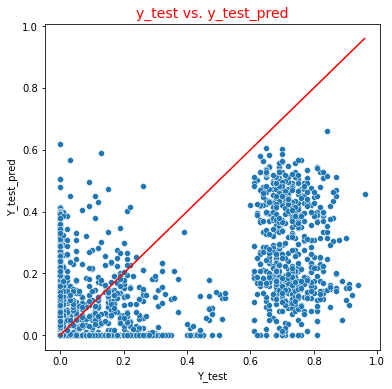

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')
plt.show()

##KNN Model
5 to 100 neighbors

In [ ]:
RMSE1_train, RMSE1_test = [], []
  
for i in range(5,101,5):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)
  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE1_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(X_test)
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE1_test.append(knn_test_rmse.round(3))

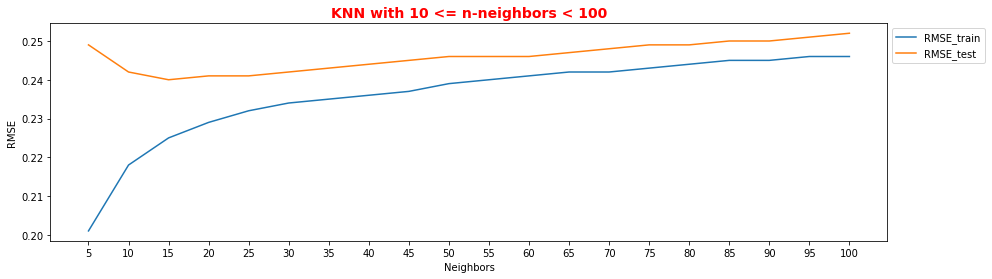

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 101, 5)
ax = sns.lineplot(x=x, y=RMSE1_train)
sns.lineplot(x=x, y=RMSE1_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(5,101,5))
ax.set_title('KNN with 10 <= n-neighbors < 100', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [ ]:
gap1 = [RMSE1_test[num]-RMSE1_train[num] for num, i in enumerate(RMSE1_train)]
print(f'RMSE Train: {RMSE1_train[gap1.index(min(gap1))]}, RMSE_test: {RMSE1_test[gap1.index(min(gap1))]}')

RMSE Train: 0.241, RMSE_test: 0.246


100 to 200 neighbors

In [ ]:
RMSE_train, RMSE_test = [], []
  
for i in range(100,201,5):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)
  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(X_test)
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE_test.append(knn_test_rmse.round(3))

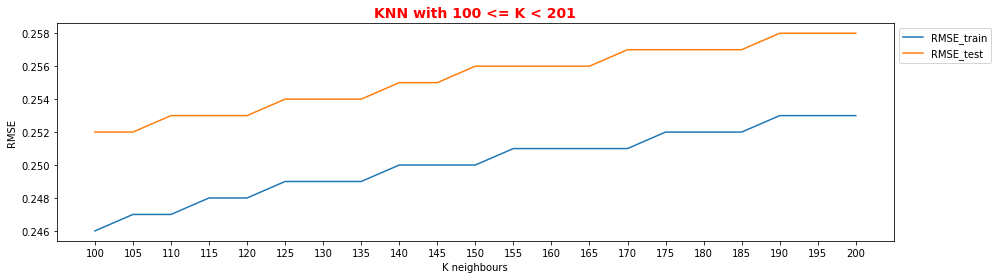

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(100, 201, 5)
ax = sns.lineplot(x=x, y=RMSE_train)
sns.lineplot(x=x, y=RMSE_test, ax=ax)
# ax.axvline(x=180, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xticks(np.arange(100,201,5))
ax.set_xlabel('K neighbours')
ax.set_ylabel('RMSE')
ax.set_title('KNN with 100 <= K < 201', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [ ]:
gap2 = [RMSE_test[num]-RMSE_train[num] for num, i in enumerate(RMSE_train)]
print(f'RMSE Train: {RMSE_train[gap2.index(min(gap2))]}, RMSE_test: {RMSE_test[gap2.index(min(gap2))]}')

RMSE Train: 0.247, RMSE_test: 0.252


##Decistion Tree Model
Option 1: single run

In [ ]:
# single run
tree = DecisionTreeRegressor(max_leaf_nodes=41, min_samples_split=2000)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train).clip(0, 1)
train_rmse = np.sqrt(mse(y_train, y_train_pred))
y_test_pred = tree.predict(X_test).clip(0, 1)
test_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f'train: {train_rmse}')
print(f'test: {test_rmse}')

train: 0.2609831841564313
test: 0.2870312891313114


Option 2: loop

In [ ]:
RMSE3_train, RMSE3_test = [], []

for i in range(2,200):
  tree = DecisionTreeRegressor(random_state = 15, max_leaf_nodes=i)
  tree.fit(X_train, y_train)
  y_train_pred = tree.predict(X_train).clip(0, 1)
  train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE3_train.append(train_rmse.round(3))
  y_test_pred = tree.predict(X_test).clip(0, 1)
  test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE3_test.append(test_rmse.round(3))

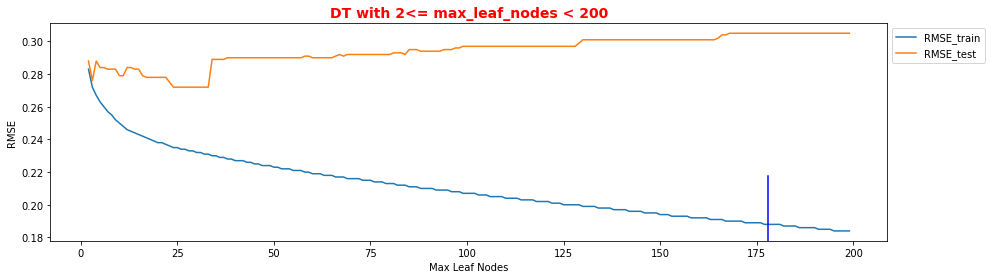

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(2, 200)
ax = sns.lineplot(x=x, y=RMSE3_train)
sns.lineplot(x=x, y=RMSE3_test, ax=ax)
ax.axvline(x=178, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('RMSE')
ax.set_title('DT with 2<= max_leaf_nodes < 200', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

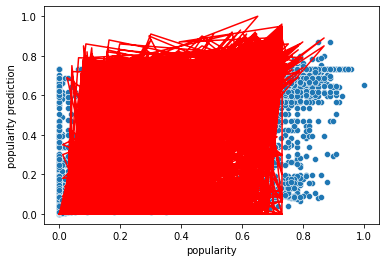

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train_pred, y_train, 'r')
ax.set_ylabel('popularity prediction')
plt.show()

In [ ]:
gap3 = [(RMSE3_train[i]/RMSE3_test[i]) for i, num in enumerate(RMSE3_train)]

print(f'Minimum validiation is: {min(gap3):.3%} in index number {gap3.index(min(gap3))}')
print(f'Maximum validiation is: {max(gap3):.3%} in index number {gap3.index(max(gap3))}')

Minimum validiation is: 60.328% in index number 193
Maximum validiation is: 98.551% in index number 1


In [ ]:
print('Feature importances:')
for i, col in enumerate(X_train.columns):
  print(f'{col:12}: {tree.feature_importances_[i]:.3f}')

Feature importances:
speechiness : 0.044
tempo       : 0.036
loudness    : 0.117
acousticness: 0.049
energy      : 0.102
year        : 0.069
danceability: 0.034
explicit    : 0.309
instrumentalness: 0.101
liveness    : 0.033
long_tracks : 0.000
duration_ms : 0.108


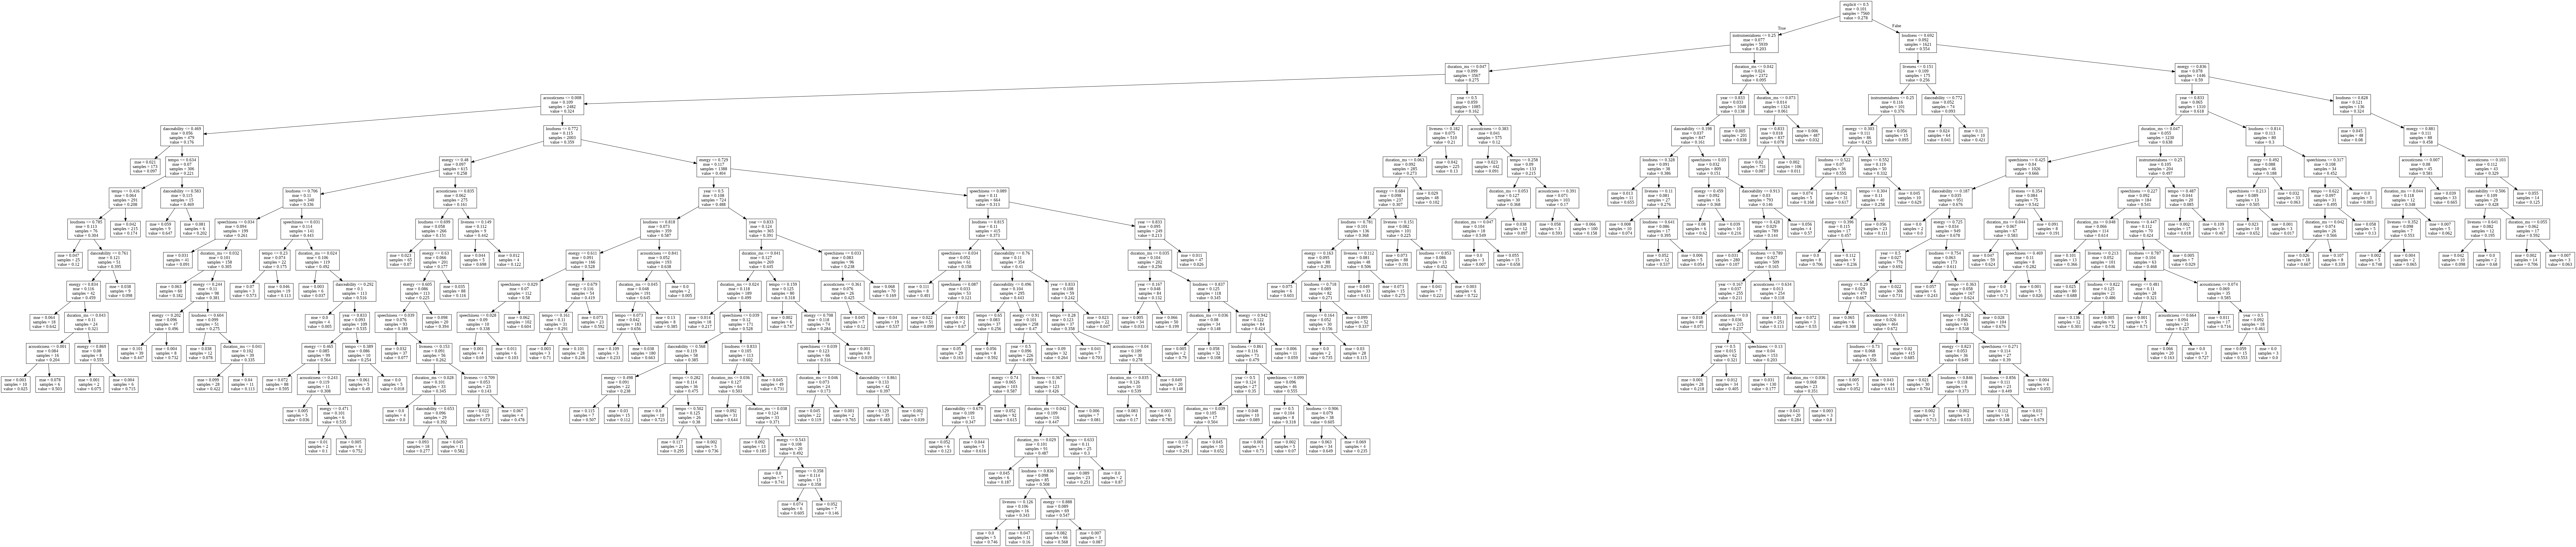

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##Now let's classify if we can classify a hit or not

In [ ]:
# sc = StandardScaler()
# sc.fit(df)
X = df[['speechiness', 'tempo','loudness','acousticness','instrumentalness','energy','year','danceability','explicit','duration_ms']]
y = df['popularity_group']
X_train, X_test, y_train, y_test = split(X, y , test_size = 0.2 , random_state = 42 )
###################################################################################################################################
def instrumentalness_criteria(X):
    X['instrumentalness'] = list(map((lambda x: 1 if x < 0.1 else (3 if x > 0.95 else 2)), X.instrumentalness))

instrumentalness_tranformer = FunctionTransformer(instrumentalness_criteria)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)
###################################################################################################################################
class ReplaceZeroTransformer():
    """Eliminates Zero values from tempo columns and replace it 
       with the median or mean of non-zero values as specified.
       defaut is set to 'median'.
    """

    def __init__(self, method='median'):
        self.method = method

    def transform(self, X):
        if self.method == 'median':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].median()
        elif self.method == 'mean':
            X.loc[X['tempo']==0, 'tempo'] = X.loc[X['tempo']>0, 'tempo'].mean()
        else:
            raise Exception("Method can be 'median' or 'mean' only!")
        return X
###################################################################################################################################
tempo_transformer = ReplaceZeroTransformer()
X_train = tempo_transformer.transform(X_train)
X_test = tempo_transformer.transform(X_test)
###################################################################################################################################
scaler = MinMaxScaler()
cols = ['speechiness', 'tempo','loudness','acousticness','energy','year','danceability','explicit','instrumentalness','duration_ms']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

##KNN

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, scoring='recall')
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

predictions=best_model.predict(X_test)
print('The accuracy of the K-Nearest Neighbor w/ best parametersclassifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 29
The accuracy of the K-Nearest Neighbor w/ best parametersclassifier on training data is  71.64 %


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 316  376]
 [ 164 1034]]


In [ ]:
neigh = KNeighborsClassifier(leaf_size = 1, p= 1, n_neighbors=29)
best_model = neigh.fit(X_train,y_train)
predictions=best_model.predict(X_test)
print('The accuracy of the K-Nearest Neighbor w/ best parametersclassifier on training data is ', round(accuracy_score(y_test,predictions)*100,2),'%')

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

The accuracy of the K-Nearest Neighbor w/ best parametersclassifier on training data is  73.66 %
[[ 494  381]
 [ 208 1153]]


In [ ]:
X_test['y_hats'] = predictions
X_test['y'] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_test.head()

,speechiness,tempo,loudness,acousticness,instrumentalness,energy,year,danceability,explicit,duration_ms,y_hats,y
158386,0.106250,0.300152,0.405330,0.887550,0.5,0.179786,0.333333,0.713273,0.0,0.059320,True,True
173897,0.042708,0.561166,0.831862,0.022288,0.0,0.695921,0.333333,0.734549,1.0,0.090677,True,True
126123,0.084271,0.203134,0.784690,0.093874,0.0,0.634905,0.000000,0.824721,1.0,0.154290,True,True
108163,0.078229,0.260140,0.745608,0.134537,0.5,0.773941,0.333333,0.643364,0.0,0.172024,True,False
126346,0.040521,0.645498,0.556155,0.941767,0.5,0.298817,0.000000,0.297872,0.0,0.191166,True,False


In [ ]:
X1 = df[['speechiness', 'tempo','loudness','acousticness','instrumentalness','energy','year','danceability','explicit','duration_ms']]
X2 = df[['id']]
X3 = df[['popularity']]
X4 = df[['name']]
X5 = df[['artists']]
X6 = df[['release_date']]
y1 = df['popularity_group']
y_hat =best_model.predict(X1)
X1['y_hat'] = y_hat
X1['y'] = y1
X1['id'] = X2
X1['popularity'] = X3
X1['name'] = X4
X1['artists'] = X5
X1['release_date'] = X6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
X1.head()

,speechiness,tempo,loudness,acousticness,instrumentalness,energy,year,danceability,explicit,duration_ms,y_hat,y,id,popularity,name,artists,release_date
9087,0.0623,117.153,-17.796,0.887,0.000000,0.201,2018,0.319,0,187333,True,True,1hx7X9cMXHWJjknb9O6Ava,27,The September Of My Years - Live At The Sands ...,['Frank Sinatra'],2018-05-04
9091,0.0576,82.332,-18.168,0.938,0.000005,0.129,2018,0.269,0,236800,True,True,19oquvXf3bc65GSqtPYA5S,26,It Was A Very Good Year - Live At The Sands Ho...,['Frank Sinatra'],2018-05-04
9111,0.0347,117.072,-14.118,0.881,0.000022,0.212,2020,0.644,0,313093,True,True,55qyghODi24yaDgKBI6lx0,19,"The Circle Game - Live at The 2nd Fret, Philad...",['Joni Mitchell'],2020-10-30
9117,0.0450,115.864,-15.533,0.955,0.000162,0.184,2020,0.627,0,295093,True,True,00xemFYjQNRpOlPhVaLAHa,19,"Urge For Going - Live at The 2nd Fret, Philade...",['Joni Mitchell'],2020-10-30
9119,0.2430,88.303,-14.087,0.888,0.000015,0.331,2020,0.581,0,183440,True,True,2lm5FQJRHvc3rUN5YHpEWj,19,What's The Story Mr. Blue - Live at The 2nd Fr...,['Joni Mitchell'],2020-10-30


In [ ]:
df_sorted = X1.sort_values('popularity', ascending= False)
df_sorted.head(50)

,speechiness,tempo,loudness,acousticness,instrumentalness,energy,year,danceability,explicit,duration_ms,y_hat,y,id,popularity,name,artists,release_date
20062,0.0601,143.874,-8.761,0.72100,0.000013,0.436,2021,0.585,1,242014,True,True,7lPN2DXiMsVn7XUKtOW1CS,100,drivers license,['Olivia Rodrigo'],2021-01-08
19862,0.0369,90.989,-3.558,0.22100,0.000000,0.722,2020,0.700,1,140526,False,True,3tjFYV6RSFtuktYl3ZtYcq,96,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",2020-07-24
19866,0.0878,144.015,-4.771,0.46800,0.000000,0.802,2020,0.737,1,172325,False,True,35mvY5S1H3J2QZyna3TFe0,96,positions,['Ariana Grande'],2020-10-30
19886,0.0544,109.928,-10.059,0.40100,0.000052,0.573,2020,0.731,1,205090,False,True,47EiUVwUp4C9fGccaPuUCS,95,DÁKITI,"['Bad Bunny', 'Jhay Cortez']",2020-10-30
19976,0.1520,163.908,-4.158,0.21200,0.000493,0.666,2020,0.863,1,178947,False,True,7vrJn5hDSXRmdXoR30KgF1,95,BICHOTA,['KAROL G'],2020-10-23
19928,0.2860,81.993,-4.892,0.03030,0.000000,0.618,2020,0.856,0,203201,False,True,2XIc1pqjXV3Cr2BQUGNBck,94,LA NOCHE DE ANOCHE,"['Bad Bunny', 'ROSALÍA']",2020-11-27
19868,0.0940,109.978,-6.476,0.23700,0.000000,0.585,2020,0.830,1,173711,False,True,6Im9k8u9iIzKMrmV7BWtlF,94,34+35,['Ariana Grande'],2020-10-30
19870,0.1820,140.175,-7.621,0.19000,0.000000,0.598,2020,0.711,1,123429,False,True,5vGLcdRuSbUhD8ScwsGSdA,94,Whoopty,['CJ'],2020-08-20
19872,0.0299,93.005,-7.357,0.21300,0.000000,0.413,2020,0.662,1,161385,False,True,27OeeYzk6klgBh83TSvGMA,94,WITHOUT YOU,['The Kid LAROI'],2020-11-06
19876,0.0697,94.009,-7.773,0.21800,0.130000,0.340,2020,0.889,0,174321,False,True,54bFM56PmE4YLRnqpW6Tha,94,Therefore I Am,['Billie Eilish'],2020-11-12


In [ ]:
df_results = df_sorted.copy()
df_results['date'] = pd.to_datetime(df_results['release_date'])
df_results['year'], df_results['month'] = df_results['date'].dt.year, df_results['date'].dt.month
df_results_true2020 = df_results[(df_results.y_hat == True) & (df_results.year == 2020)]
df_results_true2020.head(50)

,speechiness,tempo,loudness,acousticness,instrumentalness,energy,year,danceability,explicit,duration_ms,y_hat,y,id,popularity,name,artists,release_date,date,month
19900,0.0545,124.099,-9.386,0.786000,0.000000,0.374,2020,0.642,0,169266,True,True,45bE4HXI0AwGZXfZtMp8JR,93,you broke me first,['Tate McRae'],2020-04-17,2020-04-17,4
19908,0.0398,79.859,-7.071,0.864000,0.000000,0.239,2020,0.631,1,149297,True,True,4y4spB9m0Q6026KfkAvy9Q,92,Lonely (with benny blanco),"['Justin Bieber', 'benny blanco']",2020-10-16,2020-10-16,10
19880,0.3750,133.073,-7.509,0.019400,0.000000,0.454,2020,0.935,1,187541,True,True,4Oun2ylbjFKMPTiaSbbCih,92,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",2020-08-07,2020-08-07,8
19896,0.0333,102.078,-7.301,0.584000,0.000000,0.425,2020,0.357,0,198040,True,True,4xqrdfXkTW4T0RauPLv3WA,91,Heather,['Conan Gray'],2020-03-20,2020-03-20,3
19864,0.0583,121.002,-8.370,0.499000,0.000008,0.655,2020,0.436,1,279204,True,True,3YJJjQPAbDT7mGpX3WtQ9A,91,Good Days,['SZA'],2020-12-25,2020-12-25,12
19988,0.0299,110.184,-5.851,0.698000,0.000000,0.324,2020,0.641,0,185487,True,True,0E4Y1XIbs8GrAT1YqVy6dq,90,Afterglow,['Ed Sheeran'],2020-12-21,2020-12-21,12
19898,0.1700,81.112,-9.195,0.833000,0.001790,0.574,2020,0.392,0,214707,True,True,0lx2cLdOt3piJbcaXIV74f,89,willow,['Taylor Swift'],2020-12-11,2020-12-11,12
19954,0.1350,144.026,-8.765,0.731000,0.000000,0.431,2020,0.726,0,173333,True,True,7eJMfftS33KTjuF7lTsMCx,89,death bed (coffee for your head),"['Powfu', 'beabadoobee']",2020-02-08,2020-02-08,2
39310,0.1910,124.025,-8.784,0.020600,0.023700,0.485,2020,0.965,1,222523,True,True,1zLBsSVxETQOfINOLYvT5m,87,GIRL LIKE ME,"['Black Eyed Peas', 'Shakira']",2020-11-02,2020-11-02,11
19998,0.0581,139.898,-4.904,0.131000,0.000018,0.637,2020,0.333,0,172693,True,True,5KCbr5ndeby4y4ggthdiAb,87,Wonder,['Shawn Mendes'],2020-10-02,2020-10-02,10
